In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# [seeds](https://archive.ics.uci.edu/ml/datasets/seeds) Dataset

In [2]:
cols = ['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry_coef', 'l_groove', 'type']
seeds = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt',
                    delim_whitespace=True, names=cols)
seeds.head()

,area,perimeter,compactness,length,width,asymmetry_coef,l_groove,type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


## Checking correlation between `width` and `length`

In [7]:
from scipy.stats import pearsonr

In [3]:
width = seeds['width']
length = seeds['length']

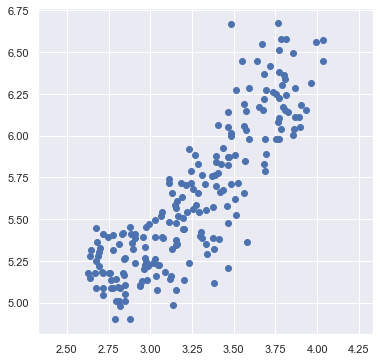

In [5]:
# scatter plot
fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(width, length)

plt.axis('equal')
plt.show()

In [11]:
# calculate pearson correlation
correlation, pvalue = pearsonr(width, length)
correlation

0.8604149377143466

## Decorrelating with `PCA`

In [12]:
from sklearn.decomposition import PCA

In [13]:
# create model
model1 = PCA()

In [17]:
# data
seeds_ = seeds[['width', 'length']]

# apply fit_transform to data
pca_features = model1.fit_transform(seeds_)

In [18]:
# get features
xs = pca_features[:, 0]
ys = pca_features[:, 1]

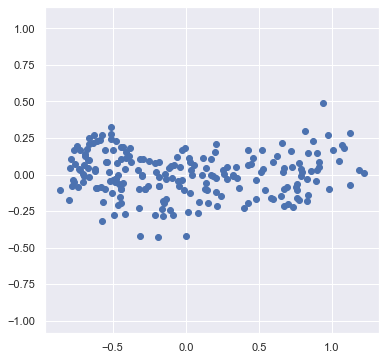

In [19]:
# scatter plot
fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(xs, ys)

plt.axis('equal')
plt.show()

In [20]:
# calculate pearson correlation of xs and ys
correlation, pvalues = pearsonr(xs, ys)
correlation

1.0408340855860843e-16

## Finding the first principal component

In [22]:
# get mean of grain samples
mean = model1.mean_

In [23]:
# get first principal component
first_pc = model1.components_[0, :]

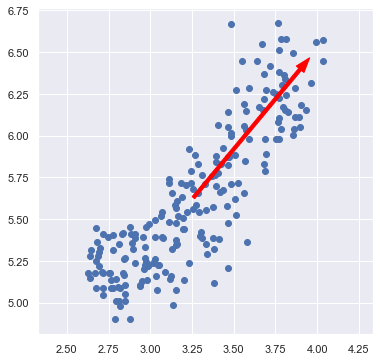

In [26]:
# plot untransformed pts with first_pc as an arrow
fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(width, length)
ax.arrow(mean[0], mean[1],
         first_pc[0], first_pc[1],
         color='red', width=0.02)

plt.axis('equal')
plt.show()

# [Fishcatch](http://jse.amstat.org/jse_data_archive.htm) Dataset

In [27]:
cols = ['obs', 'species', 'weight', 'length1', 'length2', 'length3', 'height%', 'width%', 'sex']
fish = pd.read_csv('http://jse.amstat.org/datasets/fishcatch.dat.txt',
                   delim_whitespace=True, names=cols)
fish.head()

,obs,species,weight,length1,length2,length3,height%,width%,sex
0,1,1,242.0,23.2,25.4,30.0,38.4,13.4,NaN
1,2,1,290.0,24.0,26.3,31.2,40.0,13.8,NaN
2,3,1,340.0,23.9,26.5,31.1,39.8,15.1,NaN
3,4,1,363.0,26.3,29.0,33.5,38.0,13.3,NaN
4,5,1,430.0,26.5,29.0,34.0,36.6,15.1,NaN


In [28]:
# To match it with DataCamp dataset
fish_ = fish.copy()
fish_.drop(columns=['obs', 'species', 'sex'], inplace=True)
fish_.drop(index=range(103,159), inplace=True)
fish_.drop(index=range(61, 72), inplace=True)
fish_.drop(index=range(35, 41), inplace=True)
fish_.reset_index(inplace=True, drop=True)
fish_.dropna(inplace=True)
fish_.head()

,weight,length1,length2,length3,height%,width%
0,242.0,23.2,25.4,30.0,38.4,13.4
1,290.0,24.0,26.3,31.2,40.0,13.8
2,340.0,23.9,26.5,31.1,39.8,15.1
3,363.0,26.3,29.0,33.5,38.0,13.3
4,430.0,26.5,29.0,34.0,36.6,15.1


In [29]:
fish_.shape

(85, 6)

## Variance of the PCA features

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [31]:
# Setup steps for pipeline
scaler = StandardScaler()
pca = PCA()

steps = [('scaler', scaler),
         ('pca', pca)]

In [32]:
# create pipeline model
model2 = Pipeline(steps)

In [33]:
# fit to data
model2.fit(fish_)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA())])

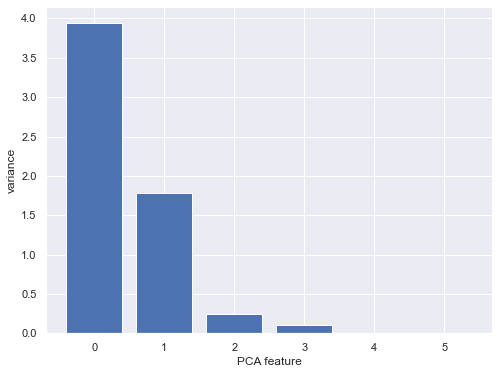

In [38]:
# plot the explained variances
features = range(pca.n_components_)

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(features, pca.explained_variance_)
ax.set_xlabel('PCA feature')
ax.set_ylabel('variance')
ax.set_xticks(features)

plt.show()

## Dimension reduction of the fish measurements

In [39]:
from sklearn.preprocessing import scale

In [40]:
# fish has scales ( ͡° ͜ʖ ͡°)
scaled_fish_ = scale(fish_)

In [41]:
# create PCA model with 2 components
model2 = PCA(n_components=2)

In [42]:
# fit to scaled data
model2.fit(scaled_fish_)

PCA(n_components=2)

In [44]:
# transform scaled features
pca_features = model2.transform(scaled_fish_)
pca_features.shape

(85, 2)

# tf-idf word-frequency array

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

In [47]:
# create tfidf vectorizer
tfidf = TfidfVectorizer()

In [48]:
# apply fit_transform to document
csr_mat = tfidf.fit_transform(documents)

In [49]:
# result of toarray() method
print(csr_mat.toarray())

[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]


In [51]:
# get words
words = tfidf.get_feature_names()
words

['cats', 'chase', 'dogs', 'meow', 'say', 'woof']

# Clustering [Wikipedia](https://blog.lateral.io/2015/06/the-unknown-perils-of-mining-wikipedia/)

In [52]:
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans

In [53]:
# Setup steps for pipeline
svd = TruncatedSVD(n_components=50)
kmeans = KMeans(6)

steps = [('svd', svd),
         ('kmeans', kmeans)]

In [54]:
# create pipeline
model3 = Pipeline(steps)

In [1]:
# Too big, can't continue, laptop dies :(((((((((((( need2cloudsoon